## **IMPORTING THE LIBRARIES**

In [126]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [127]:
path = '/content/drive/MyDrive/CAPSTONE/Project/LOGISTIC MAPS/'
name = '1'
extension = '.png'

## **DEFINING THE FUNCTIONS TO IMPLEMENT L.M.**

In [128]:
def getImageMatrix_gray(location):
  image = Image.open(location, mode='r').convert('LA')
  pix = image.load()
  image_size = image.size
  image_matrix = []
  for width in range(int(image_size[0])):
    row = []
    for height in range(int(image_size[1])):
      row.append((pix[width, height]))
    image_matrix.append(row)
  return image_matrix, image_size[0], image_size[1]

In [129]:
# Function to generate the Logistic Key
def logistic_key(x, r, size):
    """
    This function accepts the initial x value, 
    r value and the number of keys required for
    encryption.
    The function returns a list of pseudo-random
    numbers generated from the logistic equation. 
    """

    key = []

    for i in range(size):
        x = r*x*(1-x)       # This is the logistic equation
        key.append(int((x*pow(10,16))%256))     # Generated number scaled between 0-255

    return key

## **THE ORIGINAL IMAGE**

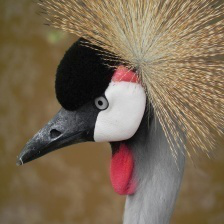

In [130]:
original_image = cv2.imread(path+name+extension)
cv2_imshow(original_image)

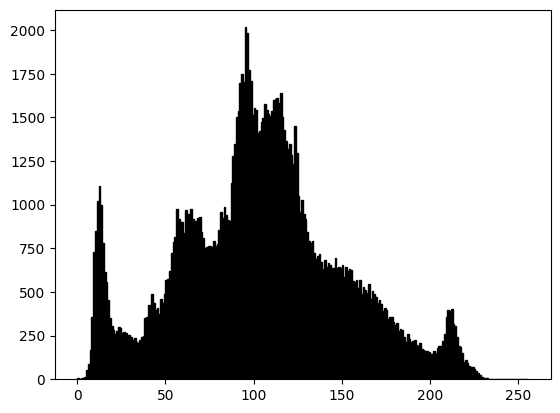

In [131]:
# HISTOGRAM OF ORIGINAL IMAGE
plt.hist(original_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

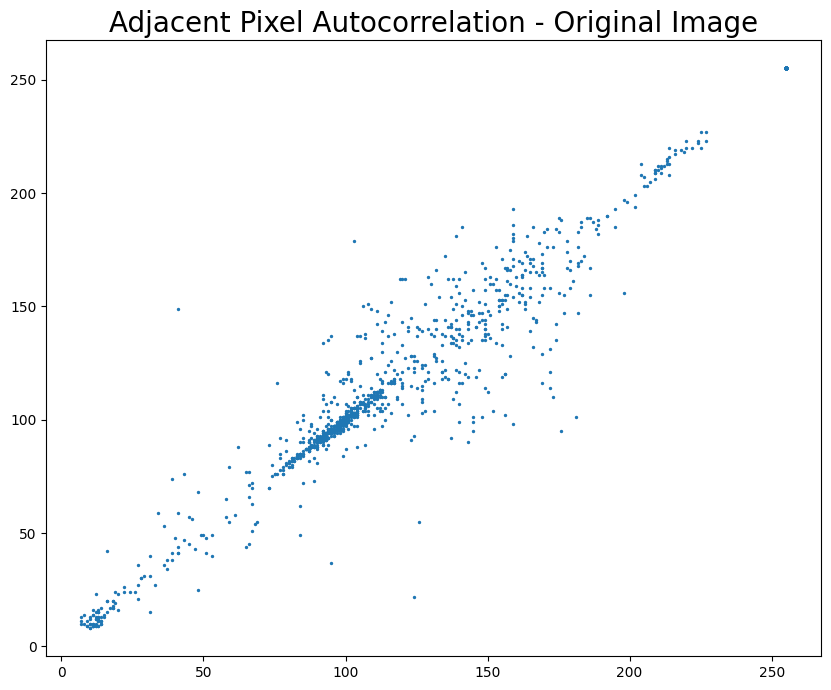

In [132]:
# Original Image
ImageMatrix,image_size,color = getImageMatrix_gray(path+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

In [133]:
# Dimensions of the image
height = original_image.shape[0]
width = original_image.shape[1]

## **GENERATING THE KEY**

In [134]:
generatedKey = logistic_key(0.01, 3.95, height*width)
print(generatedKey)

[0, 180, 237, 194, 194, 223, 121, 142, 107, 249, 80, 68, 168, 40, 55, 118, 138, 146, 151, 223, 161, 232, 115, 129, 206, 39, 175, 18, 110, 75, 162, 207, 39, 79, 109, 14, 202, 54, 87, 134, 154, 106, 6, 99, 87, 24, 162, 220, 107, 46, 51, 161, 57, 188, 224, 168, 158, 85, 193, 53, 70, 237, 57, 198, 218, 81, 117, 208, 21, 192, 12, 52, 244, 115, 8, 67, 214, 180, 53, 35, 194, 110, 253, 16, 154, 94, 168, 222, 92, 18, 211, 153, 0, 148, 116, 238, 11, 96, 65, 208, 122, 141, 230, 166, 51, 48, 204, 105, 135, 150, 110, 120, 210, 80, 171, 14, 66, 181, 38, 40, 202, 233, 30, 117, 102, 245, 100, 22, 221, 112, 184, 198, 14, 45, 11, 121, 160, 73, 7, 142, 146, 218, 70, 4, 96, 172, 181, 146, 141, 17, 134, 27, 109, 38, 126, 171, 114, 147, 254, 167, 70, 84, 21, 214, 94, 233, 151, 51, 20, 166, 31, 253, 200, 3, 252, 121, 137, 210, 120, 22, 1, 136, 56, 231, 50, 106, 214, 112, 20, 172, 218, 110, 86, 218, 31, 73, 22, 87, 154, 246, 242, 59, 184, 69, 107, 54, 52, 255, 86, 124, 196, 110, 226, 117, 76, 44, 51, 131, 99,

In [135]:
# Encryption using XOR
z = 0

## **ENCRYPTION**

In [136]:
encrypted_image = np.zeros(shape=[height, width, 3], dtype=np.uint8)

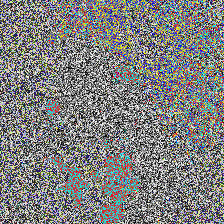

In [137]:
for i in range(height):
    for j in range(width):
        # USing the XOR operation between image pixels and keys
        encrypted_image[i, j] = original_image[i, j].astype(int) ^ generatedKey[z]
        z += 1


z = 0
for i in range(height):
    for j in range(width):
        # USing the XOR operation between image pixels and keys
        encrypted_image[i, j] = original_image[i, j].astype(int) ^ generatedKey[z]
        z += 1

cv2_imshow(encrypted_image)
Encrypted_Image = Image.fromarray(encrypted_image,'RGB')
Encrypted_Image.save(path + 'Encrypted_' + name + extension)

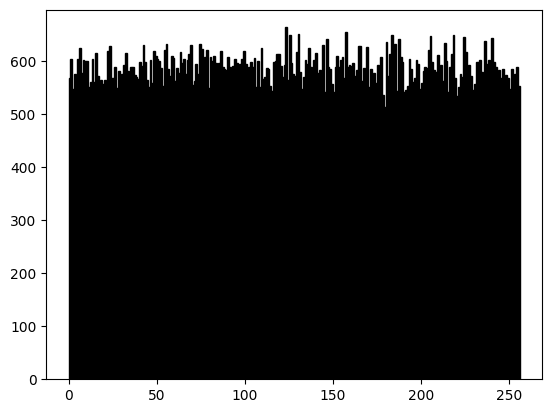

In [138]:
# HISTOGRAM OF ENCRYPTED IMAGE
Encrypted_Image = cv2.imread(path + 'Encrypted_' + name + extension)
plt.hist(Encrypted_Image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

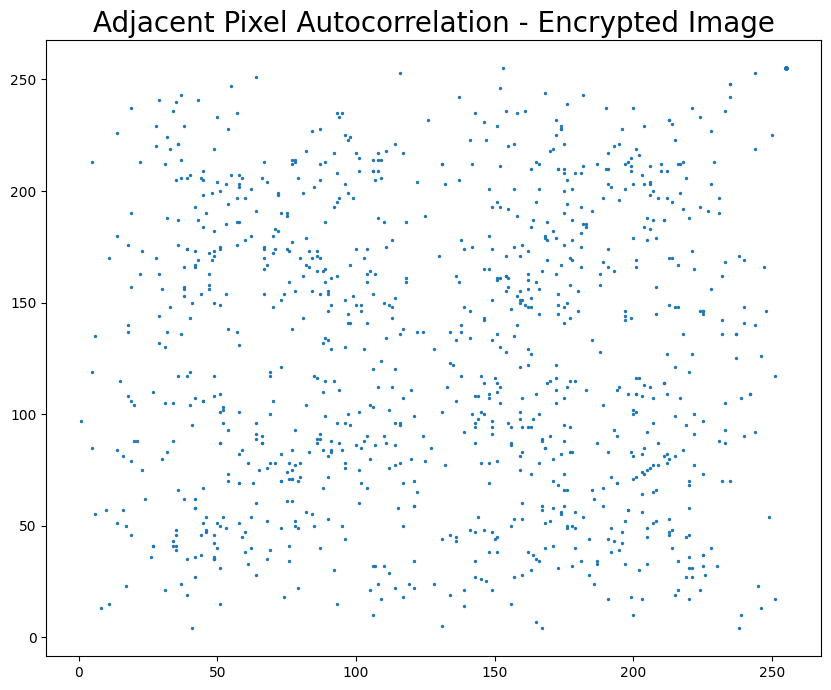

In [139]:
# Encrypted Image
ImageMatrix,image_size,color = getImageMatrix_gray(path + 'Encrypted_' + name + extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.show()

## **DECRYPTION**

In [140]:
# Decryption using XOR
z = 0

In [141]:
# Initializing the Decrypted Image
decrypted_image = np.zeros(shape=[height, width, 3], dtype=np.uint8)

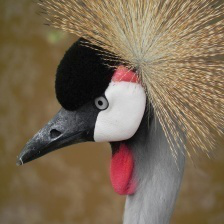

In [142]:
# Substituting all the pixels in encrypted image with nested for
for i in range(height):
    for j in range(width):
        # USing the XOR operation between encrypted image pixels and keys
        decrypted_image[i, j] = encrypted_image[i, j].astype(int) ^ generatedKey[z]
        
        z += 1

cv2_imshow(decrypted_image)
Decrypted_Image = Image.fromarray(decrypted_image, 'RGB')
Decrypted_Image.save(path + 'Decrypted_' + name + extension)

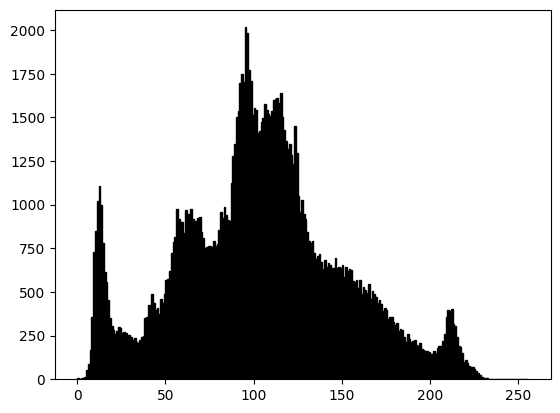

In [143]:
# HISTOGRAM OF DECRYPTED IMAGE
Decrypted_Image = cv2.imread(path + 'Decrypted_' + name + extension)
plt.hist(Decrypted_Image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

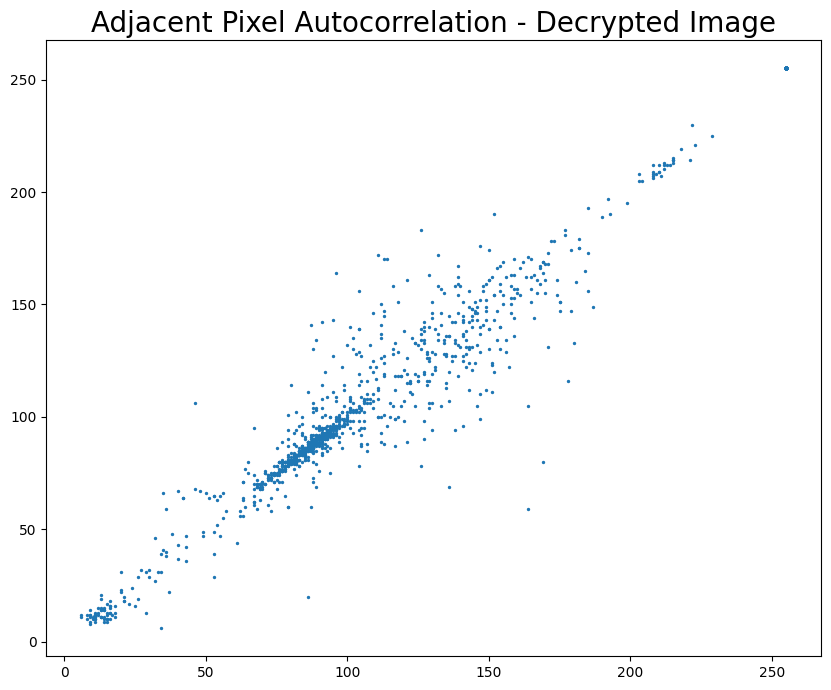

In [144]:
# Decrypted Image
ImageMatrix,image_size,color = getImageMatrix_gray(path + 'Decrypted_' + name + extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Decrypted Image', fontsize=20)
plt.show()

## **CALCULATING THE CORRELATION COEFFICIENT**

In [145]:
from numpy import asarray

In [146]:
# GENERATING THE ORIGINAL IMAGE ARRAY
original_image_array = cv2.imread(path + name + extension)
original_image_array = asarray(original_image_array)
original_image_array = original_image_array.reshape(-1)

In [147]:
# GENERATINGTHE ENCRYPTED IMAGE ARRAY
encrypted_image_array = cv2.imread(path + "Encrypted_" + name + extension)
encrypted_image_array = asarray(encrypted_image_array)
encrypted_image_array = encrypted_image_array.reshape(-1)

In [148]:
# GENERATINGTHE DECRYPTED IMAGE ARRAY
decrypted_image_array = cv2.imread(path + "Decrypted_" + name + extension)
decrypted_image_array = asarray(decrypted_image_array)
decrypted_image_array = decrypted_image_array.reshape(-1)

In [149]:
# ORIGINAL VS ENCRYPTED CORRELATION COEFFICIENT
np.corrcoef(original_image_array, encrypted_image_array)

array([[ 1.        , -0.00221561],
       [-0.00221561,  1.        ]])

In [150]:
# ORIGINAL VS DECRYPTED CORRELATION COEFFICIENT
np.corrcoef(original_image_array, decrypted_image_array)

array([[1.        , 0.66186393],
       [0.66186393, 1.        ]])